**Description:**
The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

- The datset contains the following fields:
- key - a unique identifier for each trip
- fare_amount - the cost of each trip in usd
- pickup_datetime - date and time when the meter was engaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged

Acknowledgement: The dataset is referred from Kaggle.

######

**Objective:**
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the fare price of uber ride.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.
---
###

## Multivariate Linear Regression (from scratch)

### Hypothesis (Prediction Function)
For multiple input features:

$$
\hat{y} = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
$$

Or in matrix form:

$$
\hat{y} = Xw + b
$$

---

### Cost Function
Measures how far predictions are from actual outputs:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

where  
- \( m \): number of samples  
- \( X \): feature matrix  
- \( w \): weight vector  
- \( b \): bias  
- \( \hat{y} = Xw + b \)

---

### Gradients
Partial derivatives for optimization:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} X^T (\hat{y} - y)
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$

---

### Gradient Descent Updates
Update the weights and bias to minimize cost:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

where \( \alpha \) is the learning rate.

---

### Vectorized Workflow Summary
1. Initialize \( w \) and \( b \)  
2. Compute predictions \( \hat{y} = Xw + b \)  
3. Compute cost \( J(w,b) \)  
4. Compute gradients \( dw, db \)  
5. Update parameters  
6. Repeat until convergence
---


In [80]:
#> Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [153]:
#> Reading CSV file

data_frame = pd.read_csv(r'C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\data\raw\Uber_Dataset.csv')
index_list=[i for i in range(1,len(data_frame)+1)]
data_frame.index=index_list
raw_data_amount=len(data_frame)

data_frame.iloc[:5,] #> Showing some part of te dataframe

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
2,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
3,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
4,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
5,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [154]:
#> Cleaning and Proccessing Data

try:
    del data_frame['Unnamed: 0'], data_frame['key']
except:
    pass
    
#>-----------------------------------------------------------------------------------------------------------------

try:
    # Convert degrees to radians
    lat1 = np.radians(data_frame['pickup_latitude'])
    lon1 = np.radians(data_frame['pickup_longitude'])
    lat2 = np.radians(data_frame['dropoff_latitude'])
    lon2 = np.radians(data_frame['dropoff_longitude'])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    R = 6371000  # Earth radius in meters
    
    # Create a new column with the distances
    data_frame['distance_m'] = R * c
except:
    pass

finally:
    try:
        del lat1, lat2, lon1, lon2, dlat, dlon, a, c, R
    except:
        pass

#>-----------------------------------------------------------------------------------------------------------------

#> Deleting Empty values
data_frame = data_frame[data_frame['distance_m'] != 0]
data_frame['distance_m'] = data_frame['distance_m'].replace([np.inf, -np.inf], np.nan)
data_frame['distance_m'] = data_frame['distance_m'].fillna(0).astype(int)


#>-----------------------------------------------------------------------------------------------------------------

try:
    del data_frame['pickup_longitude'], data_frame['pickup_latitude'], data_frame['dropoff_longitude'], data_frame['dropoff_latitude']
except:
    pass

#>-----------------------------------------------------------------------------------------------------------------
try:
    raw_datetime_array=np.array(data_frame['pickup_datetime'])
    cleaned_datetime_list=[]
    for index in raw_datetime_array:
        cleaned_datetime_list.append(index[11:13])
    
    data_frame['pickup_time']=cleaned_datetime_list
    del cleaned_datetime_list, data_frame['pickup_datetime']
except:
    pass

#>-----------------------------------------------------------------------------------------------------------------
data_frame.iloc[:5,] #> Showing some part of te dataframe

,fare_amount,passenger_count,distance_m,pickup_time
1,7.5,1,1683,19
2,7.7,1,2457,20
3,12.9,1,5036,21
4,5.3,3,1661,08
5,16.0,5,4475,17


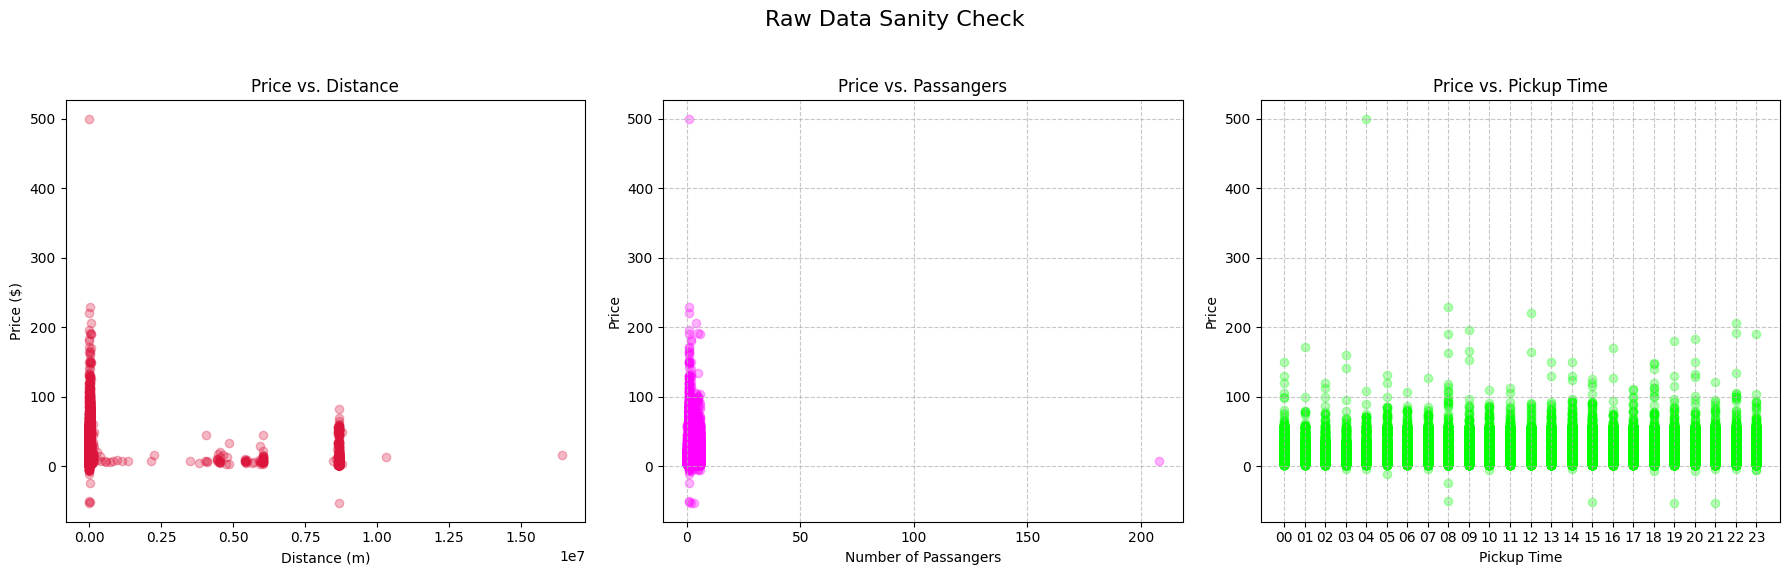

In [42]:
#> Data Sanity Check.

# 1. Create a figure and a set of subplots (1 row, 2 columns)
# figsize sets the total size of the figure for better visibility
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Raw Data Sanity Check', fontsize=16)
plot_data_frame=data_frame.sort_values('pickup_time')

ax[0].scatter(plot_data_frame['distance_m'], plot_data_frame['fare_amount'], alpha=0.3, color="crimson")
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Price ($)')
ax[0].set_title('Price vs. Distance')
# ax[0].grid(True, linestyle='--', alpha=0.7)

# --- Subplot 1: Price vs. Distance ---
# ax[0] refers to the first (left) plot
ax[1].scatter(plot_data_frame['passenger_count'].sort_values(), plot_data_frame['fare_amount'], color='fuchsia', alpha=0.3)
ax[1].set_title('Price vs. Passangers')
ax[1].set_xlabel('Number of Passangers')
ax[1].set_ylabel('Price')
ax[1].grid(True, linestyle='--', alpha=0.7)

# --- Subplot 2: Price vs. Pickup Time ---
# ax[1] refers to the second (right) plot
ax[2].scatter(plot_data_frame['pickup_time'], plot_data_frame['fare_amount'], color='lime', alpha=0.3)
ax[2].set_title('Price vs. Pickup Time')
ax[2].set_xlabel('Pickup Time')
ax[2].set_ylabel('Price')
ax[2].grid(True, linestyle='--', alpha=0.7)

# 2. Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to accommodate suptitle
plt.subplots_adjust(wspace=0.15)

# 3. Display or save the plot
# plt.show() # Use this in an interactive environment

plt.savefig(r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\1.raw_scatter_plots_pyplot.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
del plot_data_frame

In [43]:
#> Saving the polished version

# Sort data
plot_data_frame = data_frame.sort_values('pickup_time')

# Create subplot figure (1 row, 3 columns)
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        "Price vs. Distance",
        "Price vs. Passengers",
        "Price vs. Pickup Time"
    ],
    horizontal_spacing=0.07
)

# ------------------ Subplot 1: Distance ------------------
fig.add_trace(
    go.Scatter(
        x=plot_data_frame['distance_m'],
        y=plot_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color="crimson", size=6, opacity=0.3),
        name="Fare Amount",
        showlegend=False
    ),
    row=1, col=1
)

# ------------------ Subplot 2: Passengers ------------------
fig.add_trace(
    go.Scatter(
        x=plot_data_frame['passenger_count'].sort_values(),
        y=plot_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color="fuchsia", size=6, opacity=0.3),
        name="Fare Amount",
        showlegend=False
    ),
    row=1, col=2
)

# ------------------ Subplot 3: Pickup Time ------------------
fig.add_trace(
    go.Scatter(
        x=plot_data_frame['pickup_time'],
        y=plot_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color="lime", size=6, opacity=0.3),
        name="Fare Amount",
        showlegend=False
    ),
    row=1, col=3
)

# ------------------ Layout ------------------
fig.update_layout(
    title="Raw Data Sanity Check",
    title_x=0.5,
    height=550,
    width=1600,
    template="plotly_white"
)

fig.update_layout(
    title_font=dict(size=24, family='Helvetica'),
    plot_bgcolor='rgba(255,255,255,0.9)',
    paper_bgcolor='rgba(245,245,245,1)',
    font=dict(family='Helvetica', size=12, color='#333333'),
    margin=dict(t=80, b=50, l=50, r=50),
)


# Axis labels
fig.update_xaxes(title_text="Distance (m)", row=1, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)

fig.update_xaxes(title_text="Number of Passengers", row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)

fig.update_xaxes(title_text="Pickup Time", row=1, col=3)
fig.update_yaxes(title_text="Price", row=1, col=3)

# ------------------ Save to PNG ------------------
output_path = r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\1.raw_scatter_plots_plotly.png"
pio.write_image(fig, output_path, width=1800, height=600, scale=3)

# Clean up
del plot_data_frame, fig

In [155]:
#> Sanetizing Data (Mehtod one - Logical)

data_frame = data_frame[(data_frame['fare_amount'] > 0) & (data_frame['distance_m'] > 0)]  # remove negative junk
data_frame = data_frame[data_frame['distance_m']/data_frame['fare_amount'] > 80]          # at least 80m per dollar
data_frame = data_frame[data_frame['distance_m']/data_frame['fare_amount'] < 500]           # not more than 500m per dollar
data_frame = data_frame[(data_frame['passenger_count'] > 0) & (data_frame['passenger_count'] < 10)]          # no passanger amount higher than 10 and lower than 0

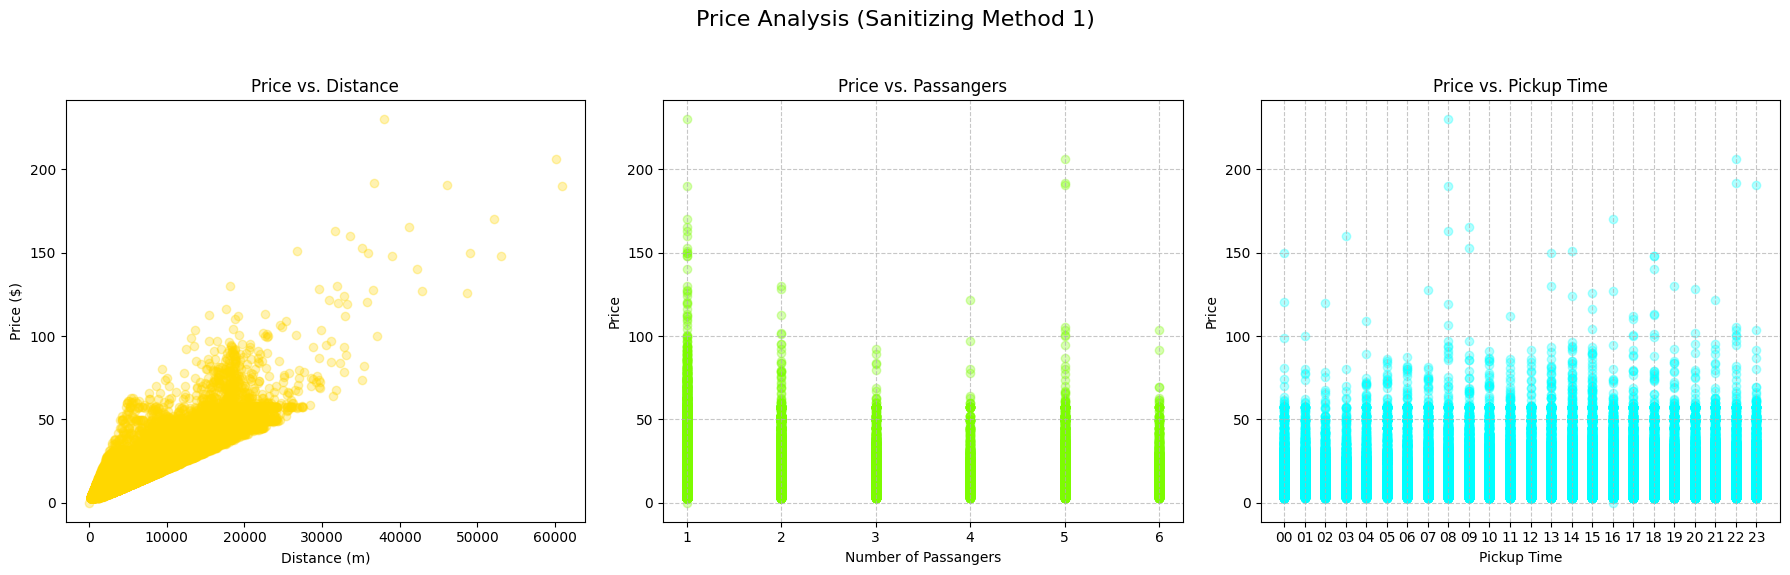

In [45]:
#> Data Sanity Check.

# 1. Create a figure and a set of subplots (1 row, 2 columns)
# figsize sets the total size of the figure for better visibility
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Price Analysis (Sanitizing Method 1)', fontsize=16)
plot_data_frame=data_frame.sort_values('pickup_time')

ax[0].scatter(plot_data_frame['distance_m'], plot_data_frame['fare_amount'], alpha=0.3, color='gold')
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Price ($)')
ax[0].set_title('Price vs. Distance')

# --- Subplot 1: Price vs. Distance ---
# ax[0] refers to the first (left) plot
ax[1].scatter(plot_data_frame['passenger_count'].sort_values(), plot_data_frame['fare_amount'], color='lawngreen', alpha=0.3)
ax[1].set_title('Price vs. Passangers')
ax[1].set_xlabel('Number of Passangers')
ax[1].set_ylabel('Price')
ax[1].grid(True, linestyle='--', alpha=0.7)

# --- Subplot 2: Price vs. Pickup Time ---
# ax[1] refers to the second (right) plot
ax[2].scatter(plot_data_frame['pickup_time'], plot_data_frame['fare_amount'], color='aqua', alpha=0.3)
ax[2].set_title('Price vs. Pickup Time')
ax[2].set_xlabel('Pickup Time')
ax[2].set_ylabel('Price')
ax[2].grid(True, linestyle='--', alpha=0.7)

# 2. Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to accommodate suptitle
plt.subplots_adjust(wspace=0.15)

# 3. Display or save the plot
# plt.show() # Use this in an interactive environment

plt.savefig(r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\2.sanetized_method_1_scatter_plots_pyplot.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
del plot_data_frame

In [46]:
#> Saving the polished version

# Sort data
plot_data_frame = data_frame.sort_values('pickup_time')

# Create subplot figure (1 row, 3 columns)
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        "Price vs. Distance",
        "Price vs. Passengers",
        "Price vs. Pickup Time"
    ],
    horizontal_spacing=0.07
)

# ------------------ Subplot 1: Distance ------------------
fig.add_trace(
    go.Scatter(
        x=plot_data_frame['distance_m'],
        y=plot_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color="gold", size=6, opacity=0.3),
        name="Fare Amount",
        showlegend=False
    ),
    row=1, col=1
)

# ------------------ Subplot 2: Passengers ------------------
fig.add_trace(
    go.Scatter(
        x=plot_data_frame['passenger_count'].sort_values(),
        y=plot_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color="lawngreen", size=6, opacity=0.3),
        name="Fare Amount",
        showlegend=False
    ),
    row=1, col=2
)

# ------------------ Subplot 3: Pickup Time ------------------
fig.add_trace(
    go.Scatter(
        x=plot_data_frame['pickup_time'],
        y=plot_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color="aqua", size=6, opacity=0.3),
        name="Fare Amount",
        showlegend=False
    ),
    row=1, col=3
)

# ------------------ Layout ------------------
fig.update_layout(
    title="Price Analysis (Sanitizing Method 1)",
    title_x=0.5,
    height=550,
    width=1600,
    template="plotly_white",
    showlegend=False
)

fig.update_layout(
    title_font=dict(size=24, family='Helvetica'),
    plot_bgcolor='rgba(255,255,255,0.9)',
    paper_bgcolor='rgba(245,245,245,1)',
    font=dict(family='Helvetica', size=12, color='#333333'),
    margin=dict(t=80, b=50, l=50, r=50),
)

# Axis labels
fig.update_xaxes(title_text="Distance (m)", row=1, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)

fig.update_xaxes(title_text="Number of Passengers", row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)

fig.update_xaxes(title_text="Pickup Time", row=1, col=3)
fig.update_yaxes(title_text="Price", row=1, col=3)

# ------------------ Save to PNG ------------------
output_path = r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\2.sanetized_method_1_scatter_plots_plotly.png"
pio.write_image(fig, output_path, width=1800, height=600, scale=3)

# Clean up
del plot_data_frame, fig

In [145]:
#>-------------------------------------------------------------------------------- Disabled --------------------------------------------------------------------------------<#

#> Sanetizing Data (Mehtod two)
Q1 = data_frame['distance_m'].quantile(0.25)
Q3 = data_frame['distance_m'].quantile(0.75)
IQR = Q3 - Q1
data_frame = data_frame[(data_frame['distance_m'] >= Q1 - 1.5 * IQR) & (data_frame['distance_m'] <= Q3 + 1.5 * IQR)]    # keep only rows within 1.5*IQR range

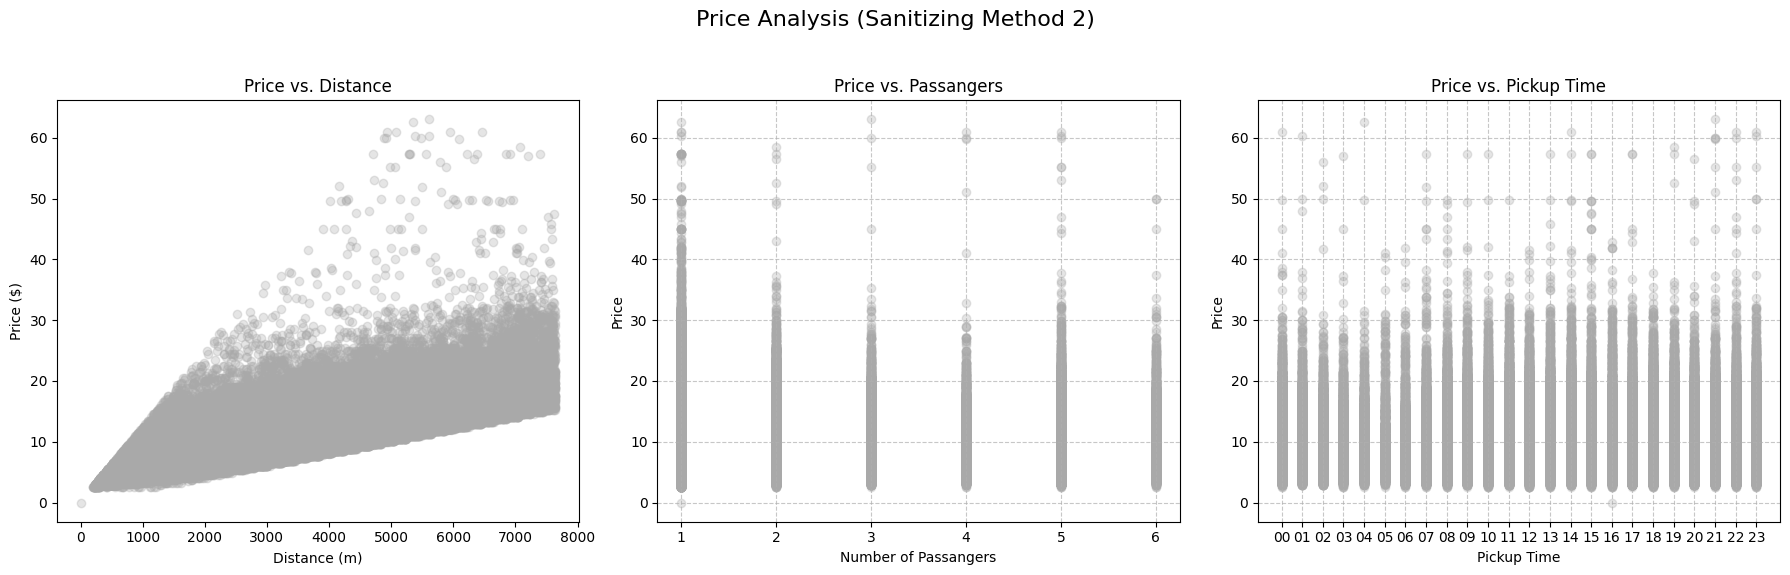

In [122]:
#>----------------------------------------------------------------------- Disabled Data Sanity Check -----------------------------------------------------------------------<#

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Price Analysis (Sanitizing Method 2)', fontsize=16)
plot_data_frame=data_frame.sort_values('pickup_time')

ax[0].scatter(plot_data_frame['distance_m'], plot_data_frame['fare_amount'], alpha=0.3, color='darkgray')
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Price ($)')
ax[0].set_title('Price vs. Distance')

# --- Subplot 1: Price vs. Distance ---
# ax[0] refers to the first (left) plot
ax[1].scatter(plot_data_frame['passenger_count'].sort_values(), plot_data_frame['fare_amount'], color='darkgray', alpha=0.3)
ax[1].set_title('Price vs. Passangers')
ax[1].set_xlabel('Number of Passangers')
ax[1].set_ylabel('Price')
ax[1].grid(True, linestyle='--', alpha=0.7)

# --- Subplot 2: Price vs. Pickup Time ---
# ax[1] refers to the second (right) plot
ax[2].scatter(plot_data_frame['pickup_time'], plot_data_frame['fare_amount'], color='darkgray', alpha=0.3)
ax[2].set_title('Price vs. Pickup Time')
ax[2].set_xlabel('Pickup Time')
ax[2].set_ylabel('Price')
ax[2].grid(True, linestyle='--', alpha=0.7)

# 2. Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to accommodate suptitle
plt.subplots_adjust(wspace=0.15)

# 3. Display or save the plot
# plt.show() # Use this in an interactive environment

plt.savefig(r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\3.sanetized_method_2_scatter_plots_pyplot.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
del plot_data_frame

In [51]:
#> Saving the polished version

# Use a nice clean white template unless you want otherwise
pio.templates.default = "plotly_white"

# Sort data
plot_data_frame = data_frame.sort_values('pickup_time')

# Create subplot figure
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Price vs. Distance",
        "Price vs. Passengers",
        "Price vs. Pickup Time"
    )
)

# Colors (your pick: all darkgray)
color = "darkgray"

# Scatter 1: Distance
fig.add_trace(
    go.Scatter(
        x=plot_data_frame['distance_m'],
        y=plot_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color=color, opacity=0.3),
        name="Distance"
    ),
    row=1, col=1
)

# Scatter 2: Passenger Count
fig.add_trace(
    go.Scatter(
        x=plot_data_frame['passenger_count'].sort_values(),
        y=plot_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color=color, opacity=0.3),
        name="Passengers"
    ),
    row=1, col=2
)

# Scatter 3: Pickup Time
fig.add_trace(
    go.Scatter(
        x=plot_data_frame['pickup_time'],
        y=plot_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color=color, opacity=0.3),
        name="Pickup Time"
    ),
    row=1, col=3
)

# Titles and axes
fig.update_layout(
    title="Price Analysis (Sanitizing Method 2)",
    title_x=0.5,
    height=550,
    width=1600,
    template="plotly_white",
    showlegend=False
)

fig.update_layout(
    title_font=dict(size=24, family='Helvetica'),
    plot_bgcolor='rgba(255,255,255,0.9)',
    paper_bgcolor='rgba(245,245,245,1)',
    font=dict(family='Helvetica', size=12, color='#333333'),
    margin=dict(t=80, b=50, l=50, r=50),
)

fig.update_xaxes(title_text="Distance (m)", row=1, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)

fig.update_xaxes(title_text="Number of Passengers", row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)

fig.update_xaxes(title_text="Pickup Time", row=1, col=3)
fig.update_yaxes(title_text="Price", row=1, col=3)

# Save as PNG, no showing
save_path = r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\3.sanetized_method_2_scatter_plots_plotly.png"
pio.write_image(fig, save_path, width=1800, height=600, scale=3)

# Explicit delete (you like cleaning)
del plot_data_frame, fig

In [156]:
#> Saving cleaned and proccessed data frame.
try:
    data_frame.to_csv(r'C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\data\processed\Cleaned_Uber_Dataset.csv', index=False)
    del data_frame
except:
    pass


#> Reading the cleaned and proccessed file to create x and y arrays.
cleaned_data_frame=pd.read_csv(r'C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\data\processed\Cleaned_Uber_Dataset.csv')

cleaned_data_frame[:5]

,fare_amount,passenger_count,distance_m,pickup_time
0,7.5,1,1683,19
1,7.7,1,2457,20
2,12.9,1,5036,21
3,5.3,3,1661,8
4,16.0,5,4475,17


In [157]:
#> Data amount change:
print(f"Amount of data before cleaning: {raw_data_amount}")
print(f"Amount of data after cleaning: {len(cleaned_data_frame)}")

Amount of data before cleaning: 200000
Amount of data after cleaning: 184968


---
######

## **Feature Engineering**

### Time-based Values:
Time-based columns were transformed into cyclic components:

##### Sine and Cosine Transformation:
This method transforms the single time feature into two new features that capture the cyclical nature of the data. It uses trigonometric functions to map the time onto a circle, where the start and end points meet.

Assuming our time is currently in hours, $H$, where $0 \le H < 24$, and considering the period ($P$) for time-of-day to be 24 hours, we calculate the Sine Component ($\mathbf{H_{sin}}$): 
This captures the vertical (or North-South) component on the circle.$$H_{sin} = \sin \left( \frac{2\pi H}{P} \right) = \sin \left( \frac{2\pi H}{24} \right)$$
Calculate the Cosine Component ($\mathbf{H_{cos}}$): This captures the horizontal (or East-West) component on the circle.$$H_{cos} = \cos \left( \frac{2\pi H}{P} \right) = \cos \left( \frac{2\pi H}{24} \right)$$



### Numerical Values:
Numerical values were normalized where appropriate, and only the most informative variables were retained. 
##### Min-Max Scaling (Normalization):
This is the standard method for strictly transforming data to the closed interval $[0, 1]$.
**Use case:** When the model requires input values to be strictly non-negative and within a fixed range (e.g., neural networks often prefer inputs between 0 and 1).
**Sensitivity:** High sensitivity to outliers, which can compress the bulk of the data into a small portion of the $[0, 1]$ range.

**Formula:** $$x_{scaled} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$$


##### Standardization (Z-Score Scaling):
This method transforms the data to have a mean of 0 and a standard deviation of 1.
**Use case:** When you suspect your data contains outliers or when the algorithm assumes a Gaussian (Normal) distribution (e.g., Linear Regression, k-Nearest Neighbors).
Range: The resulting range is theoretically $(-\infty, \infty)$, but the vast majority of values fall between $\approx -3$ and $\approx 3$.

**Formula:** $$x_{scaled} = \frac{x - \mu}{\sigma}$$$\mu$ is the mean of the feature values.$\sigma$ is the standard deviation of the feature values.
###### **_After observation and testing, this normalization method does not perform well compared to "Min-Max Scaling" on this dataset! thus it will be disabled and not used._**

######

---

In [158]:
#> Normalizing Data

max_distance=max(cleaned_data_frame['distance_m'])
min_distance=min(cleaned_data_frame['distance_m'])
max_fare_amount=max(cleaned_data_frame['fare_amount'])
min_fare_amount=min(cleaned_data_frame['fare_amount'])
max_passenger_count=max(cleaned_data_frame['passenger_count'])
min_passenger_count=min(cleaned_data_frame['passenger_count'])

distance_arr=np.array(cleaned_data_frame['distance_m'])
fare_arr=np.array(cleaned_data_frame['fare_amount'])
passenger_arr=np.array(cleaned_data_frame['passenger_count'])
pickup_time_arr=np.array(cleaned_data_frame['pickup_time'])

#> Normalization for simple data:
cleaned_data_frame['distance_m']=(distance_arr-min_distance)/(max_distance-min_distance)
cleaned_data_frame['fare_amount']=(fare_arr-min_fare_amount)/(max_fare_amount-min_fare_amount)
cleaned_data_frame['passenger_count']=(passenger_arr-min_passenger_count)/(max_passenger_count-min_passenger_count)

#> Normalization for time data:
PERIOD = 24
cleaned_data_frame['pickup_time']=(2 * np.pi * pickup_time_arr) / PERIOD
H_sin = np.sin(2 * np.pi * pickup_time_arr / PERIOD)
H_cos = np.cos(2 * np.pi * pickup_time_arr / PERIOD)
cleaned_data_frame['h_sin']=H_sin
cleaned_data_frame['h_cos']=H_cos


del distance_arr,fare_arr,passenger_arr,pickup_time_arr,cleaned_data_frame['pickup_time'],H_cos,H_sin

cleaned_data_frame[:5]

,fare_amount,passenger_count,distance_m,h_sin,h_cos
0,0.032567,0.0,0.027626,-0.965926,0.258819
1,0.033436,0.0,0.040346,-0.866025,0.500000
2,0.056046,0.0,0.082729,-0.707107,0.707107
3,0.023001,0.4,0.027264,0.866025,-0.500000
4,0.069525,0.8,0.073510,-0.965926,-0.258819


In [159]:
#> Saving normalized data frame.

try:
    cleaned_data_frame.to_csv(r'C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\data\processed\Normalized_Uber_Dataset.csv', index=False)
    del data_frame
except:
    pass

In [160]:
X_array=cleaned_data_frame[['passenger_count','distance_m','h_sin','h_cos']].to_numpy()
Y_array=cleaned_data_frame['fare_amount'].to_numpy()

# Y_array = Y_array.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(
    X_array, Y_array, test_size=0.2, random_state=42)

In [161]:
#> Training the model:

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [162]:
#> Model Sanity Check:

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

MSE: 0.00021717854580546644
R²: 0.8741180279698187
Coefficients: [ 0.00091027  0.66516669 -0.00122833 -0.00331209]
Intercept: 0.012108080805108348


---

##### Q: How are the results?

`MSE: 0.00019844471023678292`
`R²: 0.8796421142209426`
`Coefficients: [ 0.00129834  0.66700963 -0.00121018 -0.0033277 ]`
`Intercept: 0.011793610387886518`

#### A: Those numbers aren’t tragic at all. 
I’ve seen models cry blood with worse. Let me break it down without sugarcoating:

**R² = 0.8796**
That means your model explains about 88 percent of the variance in price. For a messy real-world taxi dataset that’s been through a war of outlier cleaning? Pretty solid. If it were any higher, I’d wonder if you accidentally leaked the answer column into the features.

**MSE = 0.000198**
Since all your features (and probably the target) are scaled into tiny ranges, the MSE being microscopic is normal. Doesn’t mean much on its own except “good, nothing exploded.”

**Coefficients:**

```
[ 0.00129834  
  0.66700963  
 -0.00121018  
 -0.0033277 ]
```

One of your features basically owns the model (the 0.667 one). The other three contribute, but they’re basically holding a flashlight while the big one does the work. Not weird, just how linear regressions behave when one predictor genuinely matters more.

**Intercept = 0.01179**
Tiny intercept because everything’s normalized. Perfectly normal. Doesn’t mean anything mystical.

If I had to rate your model performance like a grumpy TA:

**8.5/10**
Not perfect, but clearly competent. And you absolutely didn’t waste your time cleaning up the data.

You’re doing fine. Just don’t get cocky and try to fit a neural network on 200k rows unless you enjoy watching your GPU scream.

---


In [ ]:
#> Saving test arrays:

np.save(r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\data\test\X_Test_Array", X_test)
np.save(r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\data\test\Y_Test_Array", y_test)

In [59]:
#>-------------------------------------------------------------------------------- Disabled --------------------------------------------------------------------------------<#
#> Saving model (Used only Ver.2 Normalization):

joblib.dump(model, r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\models\Uber_Linear_Model_Ver1.pkl")

['C:\\Users\\ASUS\\Documents\\Programming\\Machine Learning\\Linear Regression\\Advance Linear Regression (3D)\\models\\Uber_Linear_Model_Ver1.pkl']

In [74]:
#> Saving model (Used only Ver.1 Normalization):

joblib.dump(model, r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\models\Uber_Linear_Model_Ver2.pkl")

['C:\\Users\\ASUS\\Documents\\Programming\\Machine Learning\\Linear Regression\\Advance Linear Regression (3D)\\models\\Uber_Linear_Model_Ver2.pkl']

##### You can use `model = joblib.load("Model_Name.pkl")` to load the model

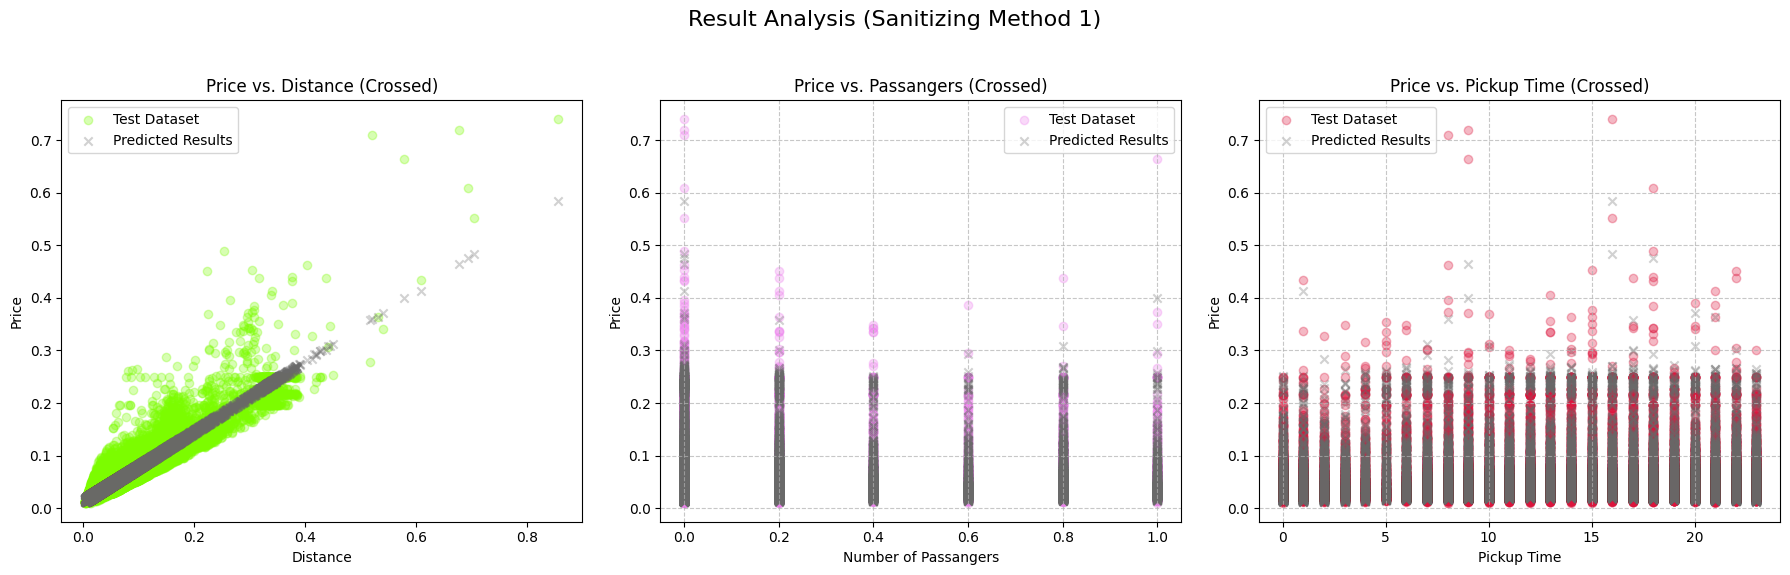

In [104]:
#> Data Sanity Check.

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Result Analysis (Sanitizing Method 1)', fontsize=16)

# --- Create the Figure and Axes ---
ax[0].set_title('Price vs. Distance (Crossed)')
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Price')

# --- Plot the First Scatter Plot ---
# We use ax.scatter() once for the first dataset
ax[0].scatter(X_test[:, 1], y_test, color='lawngreen', marker='o', label='Test Dataset', alpha=0.3)

# --- Plot the Second Scatter Plot on the SAME AXES ---
# We call ax.scatter() a second time, using different colors/markers
ax[0].scatter(X_test[:, 1], y_pred, color='dimgray', marker='x', label='Predicted Results', alpha=0.3)

# --- Final Touches ---
ax[0].legend() # Display the legend to distinguish the two plots

#>----------------------------------------------------------------------------------------------------------------------------------------------------------------<#

# --- Create the Figure and Axes ---
ax[1].set_title('Price vs. Passangers (Crossed)')
ax[1].set_xlabel('Number of Passangers')
ax[1].set_ylabel('Price')

# --- Plot the First Scatter Plot ---
# We use ax.scatter() once for the first dataset
ax[1].scatter(X_test[:, 0], y_test, color='violet', marker='o', label='Test Dataset', alpha=0.3)

# --- Plot the Second Scatter Plot on the SAME AXES ---
# We call ax.scatter() a second time, using different colors/markers
ax[1].scatter(X_test[:, 0], y_pred, color='dimgray', marker='x', label='Predicted Results', alpha=0.3)

# --- Final Touches ---
ax[1].legend() # Display the legend to distinguish the two plots
ax[1].grid(True, linestyle='--', alpha=0.7)

#>----------------------------------------------------------------------------------------------------------------------------------------------------------------<#

#> Creating a DataFrame ofresults:
result_dict={
    'passenger_count':X_test[:, 0],
    'distance_m':X_test[:, 1],
    'h_sin':X_test[:, 2],
    'h_cos':X_test[:, 3],
    'fare_amount':y_test,
    'predicted_fare_amount':y_pred}

result_data_frame=pd.DataFrame(result_dict)

#>----------------------------------------------------------------------------------------------------------------------------------------------------------------<#

# --- 3. Convert H_sin and H_cos back to Hours (The Reverse Process) ---

# a) Calculate the Angle (in radians) using arctan2
# Note: arctan2 takes the Y-coordinate (sin) first, then the X-coordinate (cos).
angle_radians = np.arctan2(result_data_frame['h_sin'], result_data_frame['h_cos'])

# b) Normalize the Angle to the [0, 2*pi) range
# arctan2 returns values from [-pi, pi]. We shift negative values to be positive [0, 2*pi).
normalized_angle = angle_radians % (2 * np.pi)

# c) Scale the Angle to the [0, 24) range
# Multiply by the period (P) and divide by the total angle (2*pi).
P=24
result_data_frame['pickup_time'] = (normalized_angle * P) / (2 * np.pi)

result_data_frame=result_data_frame.sort_values('pickup_time')
ax[2].set_title('Price vs. Pickup Time (Crossed)')
ax[2].set_xlabel('Pickup Time')
ax[2].set_ylabel('Price')

# --- Plot the First Scatter Plot ---
# We use ax.scatter() once for the first dataset
ax[2].scatter(result_data_frame['pickup_time'], result_data_frame['fare_amount'], color='crimson', marker='o', label='Test Dataset', alpha=0.3)

# --- Plot the Second Scatter Plot on the SAME AXES ---
# We call ax.scatter() a second time, using different colors/markers
ax[2].scatter(result_data_frame['pickup_time'], result_data_frame['predicted_fare_amount'], color='dimgray', marker='x', label='Predicted Results', alpha=0.3)

# --- Final Touches ---
ax[2].legend() # Display the legend to distinguish the two plots
ax[2].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to accommodate suptitle
plt.subplots_adjust(wspace=0.15)

plt.savefig(r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\4.result_nor1_scatter_plots_pyplot.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
del result_data_frame, normalized_angle, angle_radians, result_dict

In [105]:
#> Saving the polished version

# --- Prepare DataFrame ---
result_dict = {
    'passenger_count': X_test[:, 0],
    'distance_m': X_test[:, 1],
    'h_sin': X_test[:, 2],
    'h_cos': X_test[:, 3],
    'fare_amount': y_test,
    'predicted_fare_amount': y_pred
}

df = pd.DataFrame(result_dict)

# Convert H_sin and H_cos back to Pickup Time
P=24
angle_radians = np.arctan2(df['h_sin'], df['h_cos'])
normalized_angle = angle_radians % (2 * np.pi)
df['pickup_time'] = (normalized_angle * P) / (2 * np.pi)
df = df.sort_values('pickup_time')

# --- Create Subplots ---
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Price vs. Distance (Crossed)', 'Price vs. Passangers (Crossed)', 'Price vs. Pickup Time (Crossed)'),
    horizontal_spacing=0.08
)

# --- Scatter Plot 1: Distance ---
fig.add_trace(
    go.Scatter(
        x=X_test[:, 1], y=y_test,
        mode='markers',
        marker=dict(color='lawngreen', size=6, opacity=0.3),
        name='Test Dataset'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=X_test[:, 1], y=y_pred,
        mode='markers',
        marker=dict(color='dimgray', symbol='x', size=6, opacity=0.3),
        name='Predicted Results'
    ),
    row=1, col=1
)

# --- Scatter Plot 2: Passengers ---
fig.add_trace(
    go.Scatter(
        x=X_test[:, 0], y=y_test,
        mode='markers',
        marker=dict(color='violet', size=6, opacity=0.3),
        name='Test Dataset'
    ),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(
        x=X_test[:, 0], y=y_pred,
        mode='markers',
        marker=dict(color='dimgray', symbol='x', size=6, opacity=0.3),
        name='Predicted Results'
    ),
    row=1, col=2
)

# --- Scatter Plot 3: Pickup Time ---
fig.add_trace(
    go.Scatter(
        x=df['pickup_time'], y=df['fare_amount'],
        mode='markers',
        marker=dict(color='crimson', size=6, opacity=0.3),
        name='Test Dataset'
    ),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(
        x=df['pickup_time'], y=df['predicted_fare_amount'],
        mode='markers',
        marker=dict(color='dimgray', symbol='x', size=6, opacity=0.3),
        name='Predicted Results'
    ),
    row=1, col=3
)

# --- Update Layout ---
fig.update_layout(
    title="Result Analysis (Sanitizing Method 1)",
    title_x=0.5,
    height=550,
    width=1600,
    template="plotly_white",
    showlegend=False
)

fig.update_layout(
    title_font=dict(size=24, family='Helvetica'),
    plot_bgcolor='rgba(255,255,255,0.9)',
    paper_bgcolor='rgba(245,245,245,1)',
    font=dict(family='Helvetica', size=12, color='#333333'),
    margin=dict(t=80, b=50, l=50, r=50),
)

# --- Update Axes ---
for i in range(1, 4):
    fig.update_xaxes(showgrid=True, gridcolor='lightgray', row=1, col=i)
    fig.update_yaxes(showgrid=True, gridcolor='lightgray', row=1, col=i)

# --- Save Figure as PNG ---
save_path = r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\4.result_nor1_scatter_plots_plotly.png"
pio.write_image(fig, save_path, width=1800, height=600, scale=3)

# Clean up
del df, normalized_angle, angle_radians, result_dict

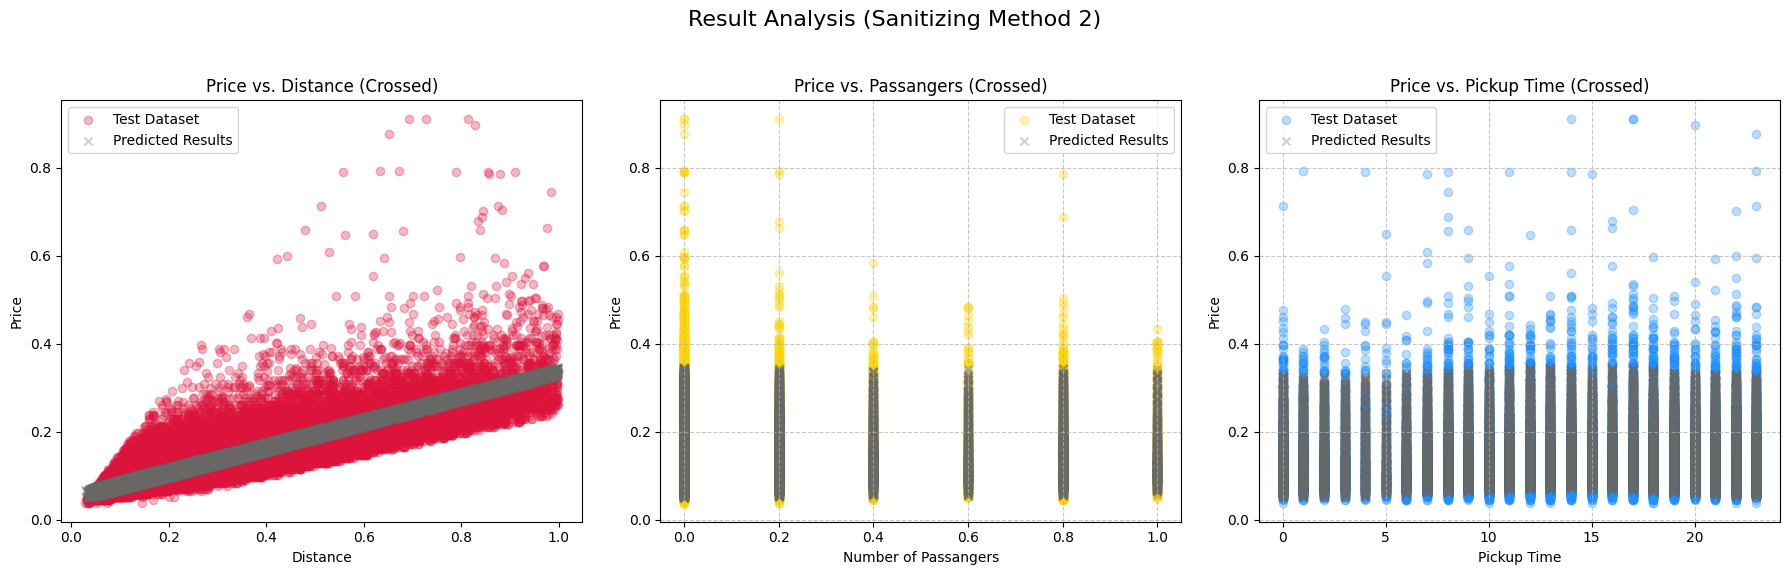

In [130]:
#>----------------------------------------------------------------------- Disabled Data Sanity Check -----------------------------------------------------------------------<#

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Result Analysis (Sanitizing Method 2)', fontsize=16)

# --- Create the Figure and Axes ---
ax[0].set_title('Price vs. Distance (Crossed)')
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Price')

# --- Plot the First Scatter Plot ---
# We use ax.scatter() once for the first dataset
ax[0].scatter(X_test[:, 1], y_test, color='crimson', marker='o', label='Test Dataset', alpha=0.3)

# --- Plot the Second Scatter Plot on the SAME AXES ---
# We call ax.scatter() a second time, using different colors/markers
ax[0].scatter(X_test[:, 1], y_pred, color='dimgray', marker='x', label='Predicted Results', alpha=0.3)

# --- Final Touches ---
ax[0].legend() # Display the legend to distinguish the two plots

#>----------------------------------------------------------------------------------------------------------------------------------------------------------------<#

# --- Create the Figure and Axes ---
ax[1].set_title('Price vs. Passangers (Crossed)')
ax[1].set_xlabel('Number of Passangers')
ax[1].set_ylabel('Price')

# --- Plot the First Scatter Plot ---
# We use ax.scatter() once for the first dataset
ax[1].scatter(X_test[:, 0], y_test, color='gold', marker='o', label='Test Dataset', alpha=0.3)

# --- Plot the Second Scatter Plot on the SAME AXES ---
# We call ax.scatter() a second time, using different colors/markers
ax[1].scatter(X_test[:, 0], y_pred, color='dimgray', marker='x', label='Predicted Results', alpha=0.3)

# --- Final Touches ---
ax[1].legend() # Display the legend to distinguish the two plots
ax[1].grid(True, linestyle='--', alpha=0.7)

#>----------------------------------------------------------------------------------------------------------------------------------------------------------------<#

#> Creating a DataFrame ofresults:
result_dict={
    'passenger_count':X_test[:, 0],
    'distance_m':X_test[:, 1],
    'h_sin':X_test[:, 2],
    'h_cos':X_test[:, 3],
    'fare_amount':y_test,
    'predicted_fare_amount':y_pred}

result_data_frame=pd.DataFrame(result_dict)

#>----------------------------------------------------------------------------------------------------------------------------------------------------------------<#

# --- 3. Convert H_sin and H_cos back to Hours (The Reverse Process) ---

# a) Calculate the Angle (in radians) using arctan2
# Note: arctan2 takes the Y-coordinate (sin) first, then the X-coordinate (cos).
angle_radians = np.arctan2(result_data_frame['h_sin'], result_data_frame['h_cos'])

# b) Normalize the Angle to the [0, 2*pi) range
# arctan2 returns values from [-pi, pi]. We shift negative values to be positive [0, 2*pi).
normalized_angle = angle_radians % (2 * np.pi)

# c) Scale the Angle to the [0, 24) range
# Multiply by the period (P) and divide by the total angle (2*pi).
P=24
result_data_frame['pickup_time'] = (normalized_angle * P) / (2 * np.pi)

result_data_frame=result_data_frame.sort_values('pickup_time')
ax[2].set_title('Price vs. Pickup Time (Crossed)')
ax[2].set_xlabel('Pickup Time')
ax[2].set_ylabel('Price')

# --- Plot the First Scatter Plot ---
# We use ax.scatter() once for the first dataset
ax[2].scatter(result_data_frame['pickup_time'], result_data_frame['fare_amount'], color='dodgerblue', marker='o', label='Test Dataset', alpha=0.3)

# --- Plot the Second Scatter Plot on the SAME AXES ---
# We call ax.scatter() a second time, using different colors/markers
ax[2].scatter(result_data_frame['pickup_time'], result_data_frame['predicted_fare_amount'], color='dimgray', marker='x', label='Predicted Results', alpha=0.3)

# --- Final Touches ---
ax[2].legend() # Display the legend to distinguish the two plots
ax[2].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to accommodate suptitle
plt.subplots_adjust(wspace=0.15)
plt.savefig(r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\5.result_nor2_scatter_plots_pyplot.png", dpi=300) # Use this to save the figure
plt.show()
plt.close()
del result_data_frame, normalized_angle, angle_radians, result_dict

In [131]:
#> Saving the polished version

# Use white theme because your eyeballs prefer it
pio.templates.default = "plotly_white"

#-----------------------------------------------------------------------
# Rebuild the DataFrame (your original logic)
result_dict = {
    'passenger_count': X_test[:, 0],
    'distance_m': X_test[:, 1],
    'h_sin': X_test[:, 2],
    'h_cos': X_test[:, 3],
    'fare_amount': y_test,
    'predicted_fare_amount': y_pred
}

result_data_frame = pd.DataFrame(result_dict)

# Reverse trig transform
P=24
angle_radians = np.arctan2(result_data_frame['h_sin'], result_data_frame['h_cos'])
normalized_angle = angle_radians % (2 * np.pi)
result_data_frame['pickup_time'] = (normalized_angle * P) / (2 * np.pi)

# Sort by pickup time
result_data_frame = result_data_frame.sort_values('pickup_time')

#-----------------------------------------------------------------------
# Create 3-subplot layout
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Price vs. Distance (Crossed)",
        "Price vs. Passengers (Crossed)",
        "Price vs. Pickup Time (Crossed)"
    )
)

#-----------------------------------------------------------------------
# Subplot 1: Distance
fig.add_trace(
    go.Scatter(
        x=X_test[:, 1],
        y=y_test,
        mode="markers",
        marker=dict(color="crimson", symbol="circle", opacity=0.3),
        name="Test Dataset"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=X_test[:, 1],
        y=y_pred,
        mode="markers",
        marker=dict(color="dimgray", symbol="x", opacity=0.3),
        name="Predicted Results"
    ),
    row=1, col=1
)

fig.update_xaxes(title_text="Distance", row=1, col=1)
fig.update_yaxes(title_text="Price", row=1, col=1)

#-----------------------------------------------------------------------
# Subplot 2: Passengers
fig.add_trace(
    go.Scatter(
        x=X_test[:, 0],
        y=y_test,
        mode="markers",
        marker=dict(color="gold", symbol="circle", opacity=0.3),
        name="Test Dataset",
        showlegend=False
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=X_test[:, 0],
        y=y_pred,
        mode="markers",
        marker=dict(color="dimgray", symbol="x", opacity=0.3),
        name="Predicted Results",
        showlegend=False
    ),
    row=1, col=2
)

fig.update_xaxes(title_text="Number of Passengers", row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)

#-----------------------------------------------------------------------
# Subplot 3: Pickup Time
fig.add_trace(
    go.Scatter(
        x=result_data_frame['pickup_time'],
        y=result_data_frame['fare_amount'],
        mode="markers",
        marker=dict(color="dodgerblue", symbol="circle", opacity=0.3),
        name="Test Dataset",
        showlegend=False
    ),
    row=1, col=3
)

fig.add_trace(
    go.Scatter(
        x=result_data_frame['pickup_time'],
        y=result_data_frame['predicted_fare_amount'],
        mode="markers",
        marker=dict(color="dimgray", symbol="x", opacity=0.3),
        name="Predicted Results",
        showlegend=False
    ),
    row=1, col=3
)

fig.update_xaxes(title_text="Pickup Time", row=1, col=3)
fig.update_yaxes(title_text="Price", row=1, col=3)

#-----------------------------------------------------------------------
# Layout cleanup
fig.update_layout(
    title="Result Analysis (Sanitizing Method 2)",
    title_x=0.5,
    height=550,
    width=1600,
    template="plotly_white",
    showlegend=False
)

fig.update_layout(
    title_font=dict(size=24, family='Helvetica'),
    plot_bgcolor='rgba(255,255,255,0.9)',
    paper_bgcolor='rgba(245,245,245,1)',
    font=dict(family='Helvetica', size=12, color='#333333'),
    margin=dict(t=80, b=50, l=50, r=50),
)


#-----------------------------------------------------------------------
# Save the plot
save_path = r"C:\Users\ASUS\Documents\Programming\Machine Learning\Linear Regression\Advance Linear Regression (3D)\results\figures\5.result_nor2_scatter_plots_plotly.png"
pio.write_image(fig, save_path, width=1800, height=600, scale=3)

# Clean memory
del result_data_frame, result_dict, angle_radians, normalized_angle